# Misc

## 239. Sliding Window Maximum

Given an array nums, there is a sliding window of size k which is moving from the very left of the array to the very right. You can only see the k numbers in the window. Each time the sliding window moves right by one position. Return the max sliding window.

Follow up: Could you solve it in linear time?

用一個 max heap 存 window 裡的數。當 windown 移動時為了能在 $O(\log k)$ 時間內砍掉 window 最前面的數，保存一個 index table 用來記下每個數字在 heap 裡的 index 為多少，並且每次動到 heap（push 或 remove）時都要去 update 這個 index table。

<font color='red'>下面答案是錯的！</font>

In [1]:
nums = [1,3,-1,-3,5,3,6,7]
k = 3

def maxSlidingWindow(nums, k):    
    idxTbl = []
    def push(heap, numOrigIdx):
        '''
        Push one number to a max heap and return the final location (index) of that number. 
        Since list is mutable the heap will be updated after each function call. 
        
        numOrigIdx is a tuple (num, origIdx) where origIdx is the location of num in the input array nums.  
        '''
        idx = len(heap)  # index of num
        heap.append(numOrigIdx)
        isEven = lambda x: x%2==0
        parentIdx = max(idx//2 -1 if isEven(idx) else (idx+1)//2 -1, 0)

        # heapify up
        while heap[parentIdx][0] < heap[idx][0]:
            heap[parentIdx], heap[idx] = heap[idx], heap[parentIdx]
            idxTbl[heap[parentIdx][1]], idxTbl[heap[idx][1]] = idxTbl[heap[idx][1]], idxTbl[heap[parentIdx][1]]
            idx = parentIdx
            parentIdx = max(idx//2 -1 if isEven(idx) else (idx+1)//2 -1, 0)

        return idx

    def remove(heap, idx):
        '''
        Remove an element from a max heap by index
        Can not input -1 as index or otherwise children index computation will go wrong. 
        '''
        heap[idx], heap[-1] = heap[-1], heap[idx]
        del heap[-1]
        childIdxL = 2*(idx+1)-1
        childIdxR = 2*(idx+1)

        # heapify down
        while (childIdxL < len(heap) and childIdxR < len(heap)) and (heap[idx][0] < heap[childIdxL][0] or heap[idx][0] < heap[childIdxR][0]): 
            # still has two children
            if heap[childIdxL][0] < heap[childIdxR][0]:
                heap[idx], heap[childIdxR] = heap[childIdxR], heap[idx]
                idxTbl[heap[idx][1]], idxTbl[heap[childIdxR][1]] = idxTbl[heap[childIdxR][1]], idxTbl[heap[idx][1]]
                idx = childIdxR
            else:
                heap[idx], heap[childIdxL] = heap[childIdxL], heap[idx]
                idxTbl[heap[idx][1]], idxTbl[heap[childIdxL][1]] = idxTbl[heap[childIdxL][1]], idxTbl[heap[idx][1]]
                idx = childIdxL

            childIdxL = 2*(idx+1)-1
            childIdxR = 2*(idx+1)

        if (childIdxL < len(heap)) and (heap[idx][0] < heap[childIdxL][0]):   # only has left child
            heap[idx], heap[childIdxL] = heap[childIdxL], heap[idx]
            idxTbl[heap[idx][1]], idxTbl[heap[childIdxL][1]] = idxTbl[heap[childIdxL][1]], idxTbl[heap[idx][1]]

    heap = []
    
    # track 每個 element 被 push 到 heap 的哪裡了
    for i, n in enumerate(nums[:k]):
        idxTbl.append(push(heap, (n, i)))
        
    res = [heap[0][0]]
            
    for i in range(len(nums)-k):
        remove(heap, idxTbl[i])
        idxTbl.append(push(heap, (nums[i+k], i+k)))  # 這個 index 只有加進去的時候是對的。後來多 push 幾個數進 heap 就亂掉了。需要一個能一邊 push 一邊 update index table 的機制
        res.append(heap[0])
    

    return res

maxSlidingWindow(nums, k)

# the right answer is [3,3,5,5,6,7] 

IndexError: list index out of range

## 171. Excel Sheet Column Number

Given a column title as appear in an Excel sheet, return its corresponding column number.

In [ ]:
import string

def titleToNumber(s):
    digit = dict(zip(string.ascii_uppercase, range(1, 27)))
    res = 0
    for c in s:
        res = 26*res + digit[c]
        
    return res
        
titleToNumber('ZZ')

## 206. Reverse Linked List
Easy

Reverse a singly linked list.

Example:

    Input: 1->2->3->4->5->NULL
    Output: 5->4->3->2->1->NULL

Follow up:

A linked list can be reversed either iteratively or recursively. Could you implement both?


In [3]:
class ListNode:
    def __init__(self, val=0, next=None): 
        self.val = val
        self.next = next
        
def reverseList_(head):    # recursive solution from LeetCode
    if head is None or head.next is None:
        return head
    else:
        res = reverseList(head.next)
        head.next.next = head
        head.next = None
        return res

def reverseList(head):   # iterative
    res = None
    while head:
        res = ListNode(val=head.val, next=res)
        head = head.next
        
    return res

def list2arr(head):
    res = []
    while head:
        res.append(head.val)
        head = head.next
    return res

head = ListNode(val=1, 
            next=ListNode(val=2, 
                next=ListNode(val=3, 
                    next=ListNode(val=4, 
                        next=ListNode(val=5, next=None)))))

print(list2arr(head))
print(list2arr(reverseList(head)))

[1, 2, 3, 4, 5]
[5, 4, 3, 2, 1]


## 46. Permutations
Medium

Given an array nums of distinct integers, return all the possible permutations. You can return the answer in any order.

Example 1:

    Input: nums = [1,2,3]
    Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

Constraints:

    1 <= nums.length <= 6
    -10 <= nums[i] <= 10
    All the integers of nums are unique.

In [12]:
nums = [1, 2, 3]

def permute(nums):
    '''
    assuming no duplicates in the input list
    '''
    if not nums:
        return [nums]
    else:
        res = []
        for i, n in enumerate(nums):
            for l in permute(nums[:i] + nums[i+1:]):
                res.append([n]+l)
        return res

permute(nums)

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

## 144. Binary Tree Preorder Traversal

Medium

Given the root of a binary tree, return the preorder traversal of its nodes' values.

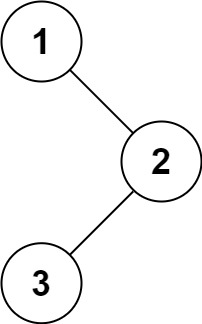

Example 1:

    Input: root = [1,null,2,3]
    Output: [1,2,3]

Constraints:

    The number of nodes in the tree is in the range [0, 100].
    -100 <= Node.val <= 100

In [6]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

def preorderTraversal(root):
    if not root:
        return []
    else:
        return [root.val] + self.preorderTraversal(root.left) + self.preorderTraversal(root.right)

## 226. Invert Binary Tree

Easy

Invert a binary tree.

Example:

Input:

         4
       /   \
      2     7
     / \   / \
    1   3 6   9

Output:

         4
       /   \
      7     2
     / \   / \
    9   6 3   1

Trivia:
This problem was inspired by this original tweet by Max Howell:

    Google: 90% of our engineers use the software you wrote (Homebrew), but you can’t invert a binary tree on a whiteboard so f*** off.



In [5]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

def invertTree(root):
    if root:
        root.left, root.right = invertTree(root.right), invertTree(root.left)
    return root